## Computer Vision LAB - 1

### Topics Covered:

1. **Image Basics**
   - Understanding an image: size, bands, channels, number of bits, and pixels.
   - Optional: Introduction to hyperspectral images.

2. **Color Models**
   - Exploring RGB (Red, Green, Blue) images.
   - Understanding and working with Grayscale images.

3. **Histograms and Normalization**
   - Representation of image histograms.
   - Implementing min-max normalization on images.

4. **Image Entropy**
   - Discussion and calculation of entropy in images.

5. **Gaussian Filter and Convolution**
   - Understanding and applying Gaussian filters.
   - Implementing convolution operations on images.

### Recommended Reading Materials:

- [Digital Image Processing](http://cv2.csie.ntu.edu.tw/CV2/2023/textbook.pdf)
- [Computer Vision: Algorithms and Applications 2nd Edition by Richard Szeliski](https://dl.icdst.org/pdfs/files4/01c56e081202b62bd7d3b4f8545775fb.pdf)


In [1]:
#computer vision lab -1 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 5.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 5.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 5.2 MB/s eta 0:00:0000:0100:01
  Using cached scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)


In [6]:
from PIL import Image
import numpy as np

image_path = 'lena15.jpg'
image = Image.open(image_path)

image_array = np.array(image)

rows, columns, channels = image_array.shape
print(f"Rows: {rows}, Columns: {columns}, Channels: {channels}")

image_size = image.size
print(f"Image Size: {image_size}")

num_bands = len(image.getbands())
print(f"Number of Bands: {num_bands}")

bits_per_channel = image_array.itemsize * 8
bits_per_pixel = bits_per_channel * num_bands
print(f"Bits per Pixel: {bits_per_pixel}")


Rows: 512, Columns: 512, Channels: 3
Image Size: (512, 512)
Number of Bands: 3
Bits per Pixel: 24


In [7]:
from PIL import Image
import numpy as np

image_path = 'lena_grey.png'
image = Image.open(image_path)

image_array = np.array(image)

image_size = image.size
print(image_size)

num_bands = len(image.getbands())
print(num_bands)

bits_per_pixel = image_array.itemsize * 8 * num_bands
print(bits_per_pixel)


(256, 256)
1
8


In [8]:
import numpy as np
from scipy.io import loadmat

# Load the MATLAB file
mat_file_path = 'SalinasA_gt.mat'
mat_data = loadmat(mat_file_path)

# Assuming the hyperspectral data is stored under the key 'hyperspectral_image'
# Adjust the key according to your file's structure
hyperspectral_image = mat_data['salinasA_gt']

# The shape of the hyperspectral image array will typically be (rows, columns, bands)
rows, columns= hyperspectral_image.shape

print(f"Rows: {rows}, Columns: {columns}")


Rows: 83, Columns: 86


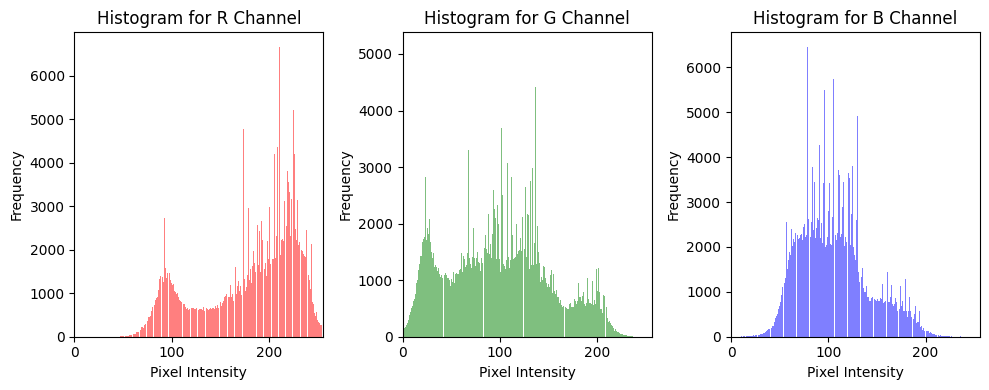

(512, 512, 3, (512, 512), 3, 24)

In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load an example image from the provided path
image_path = 'lena15.jpg'
image = Image.open(image_path)

# Convert the image to a numpy array
image_array = np.array(image)

# Display basic information about the image
rows, columns, channels = image_array.shape
image_size = image.size
num_bands = len(image.getbands())
bits_per_channel = image_array.itemsize * 8
bits_per_pixel = bits_per_channel * num_bands

# Display histogram
plt.figure(figsize=(10, 4))
for i, color in enumerate(['r', 'g', 'b']):
    plt.subplot(1, 3, i + 1)
    plt.hist(image_array[:, :, i].ravel(), bins=256, color=color, alpha=0.5)
    plt.title(f'Histogram for {color.upper()} Channel')
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

(rows, columns, channels, image_size, num_bands, bits_per_pixel)


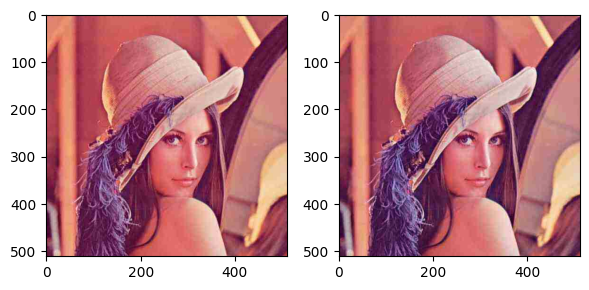

In [17]:

normalized_separate_image = np.zeros_like(image_array, dtype=np.float32)

for k in range(image_array.shape[2]):  
    min_val = np.min(image_array[:, :, k])
    max_val = np.max(image_array[:, :, k])
    for i in range(image_array.shape[0]):  
        for j in range(image_array.shape[1]):  
            normalized_separate_image[i, j, k] = (image_array[i, j, k] - min_val) / (max_val - min_val)

plt.figure(figsize=(6, 3))  
plt.subplot(1, 2, 1)

plt.imshow(image_array)
plt.subplot(1, 2, 2)

plt.imshow(normalized_separate_image)
plt.tight_layout()  
plt.show()



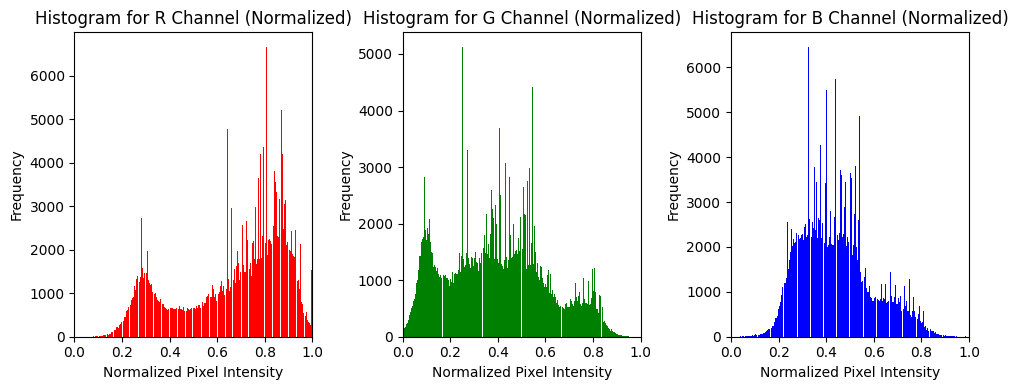

In [18]:
# Display histogram of the min-max normalized image
plt.figure(figsize=(10, 4))
for i, color in enumerate(['r', 'g', 'b']):
    plt.subplot(1, 3, i + 1)
    plt.hist(normalized_separate_image[:, :, i].ravel(), bins=256, color=color)
    plt.title(f'Histogram for {color.upper()} Channel (Normalized)')
    plt.xlim([0, 1])
    plt.xlabel('Normalized Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [19]:
import numpy as np
from scipy.stats import entropy

def calculate_entropy(image_array):
    """Calculates the entropy of an image array."""

    histogram, _ = np.histogram(image_array.flatten(), bins=256, range=(0, 256))  # Create histogram
    histogram_normalized = histogram / np.sum(histogram)  
    return entropy(histogram_normalized, base=2)  

original_entropy = calculate_entropy(image_array)
normalized_entropy = calculate_entropy(normalized_separate_image)

print("Original image entropy:", original_entropy)
print("Normalized image entropy:", normalized_entropy)


Original image entropy: 7.757822325703239
Normalized image entropy: 0.020370251831082365


In [20]:
percentage_difference = abs((normalized_entropy - original_entropy) / original_entropy) * 100


In [21]:
print(percentage_difference)

99.73742306828049


In [24]:
from PIL import Image, ImageFilter

image = Image.open('lena15.jpg')

blurred_image = image.filter(ImageFilter.GaussianBlur(radius=111))  
blurred_image.show()
blurred_image.save('blurred_image.jpg')


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/charon/snap/code/common/.cache/gio-modules/libgiolibproxy.so
eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


In [49]:
import numpy as np

def create_gaussian_filter(sigma, filter_size):
    gaussian_filter = np.zeros((filter_size, filter_size))

    filter_center = filter_size // 2

    for i in range(filter_size):
        for j in range(filter_size):
            x = i - filter_center
            y = j - filter_center
            gaussian_filter[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))

    gaussian_filter /= np.sum(gaussian_filter)

    return gaussian_filter

sigma = 0.81
filter_size = 5
gaussian_filter1 = create_gaussian_filter(sigma, 5)

gaussian_filter2 = create_gaussian_filter(sigma, 3)
gaussian_filter3=create_gaussian_filter(sigma,7)


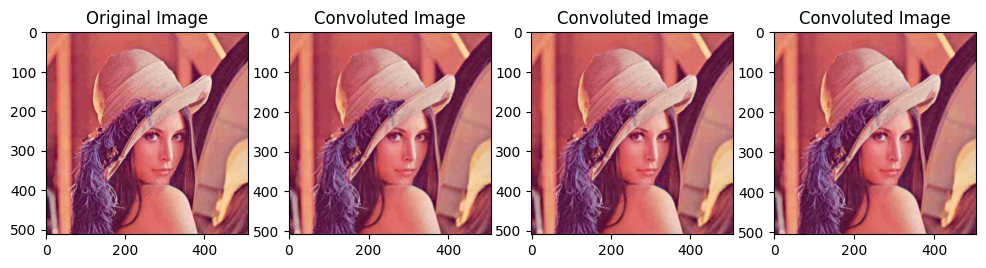

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def apply_convolution(image, kernel):
    image_height, image_width = image.shape[0], image.shape[1]
    kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]

    start_index = kernel_height // 2
    end_index_height = image_height - start_index
    end_index_width = image_width - start_index

    output_image = np.zeros((end_index_height - start_index, end_index_width - start_index, 3))

    for i in range(start_index, end_index_height):
        for j in range(start_index, end_index_width):
            for k in range(image.shape[2]):  
                
                output_image[i - start_index, j - start_index, k] = np.sum(
                    kernel * image[i - start_index:i + start_index + 1, j - start_index:j + start_index + 1, k]
                )
    output_image = np.clip(output_image, 0, 255)

    return output_image

convoluted_image = apply_convolution(image_array, gaussian_filter1)
convoluted_image2 = apply_convolution(image_array, gaussian_filter2)
convoluted_image3=apply_convolution(image_array,gaussian_filter3)
plt.figure(figsize=(12, 12))
plt.subplot(1, 4, 1)
plt.imshow(image_array)
plt.title("Original Image")

plt.subplot(1, 4, 2)
plt.imshow(convoluted_image.astype('uint8'))  
plt.title("Convoluted Image")
plt.subplot(1, 4, 3)
plt.imshow(convoluted_image2.astype('uint8'))  
plt.title("Convoluted Image")
plt.subplot(1, 4, 4)
plt.imshow(convoluted_image3.astype('uint8'))  
plt.title("Convoluted Image")
plt.show()
